In [10]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
os.getcwd()

'/content'

In [11]:
df=pd.read_csv("/diabetes.csv")

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

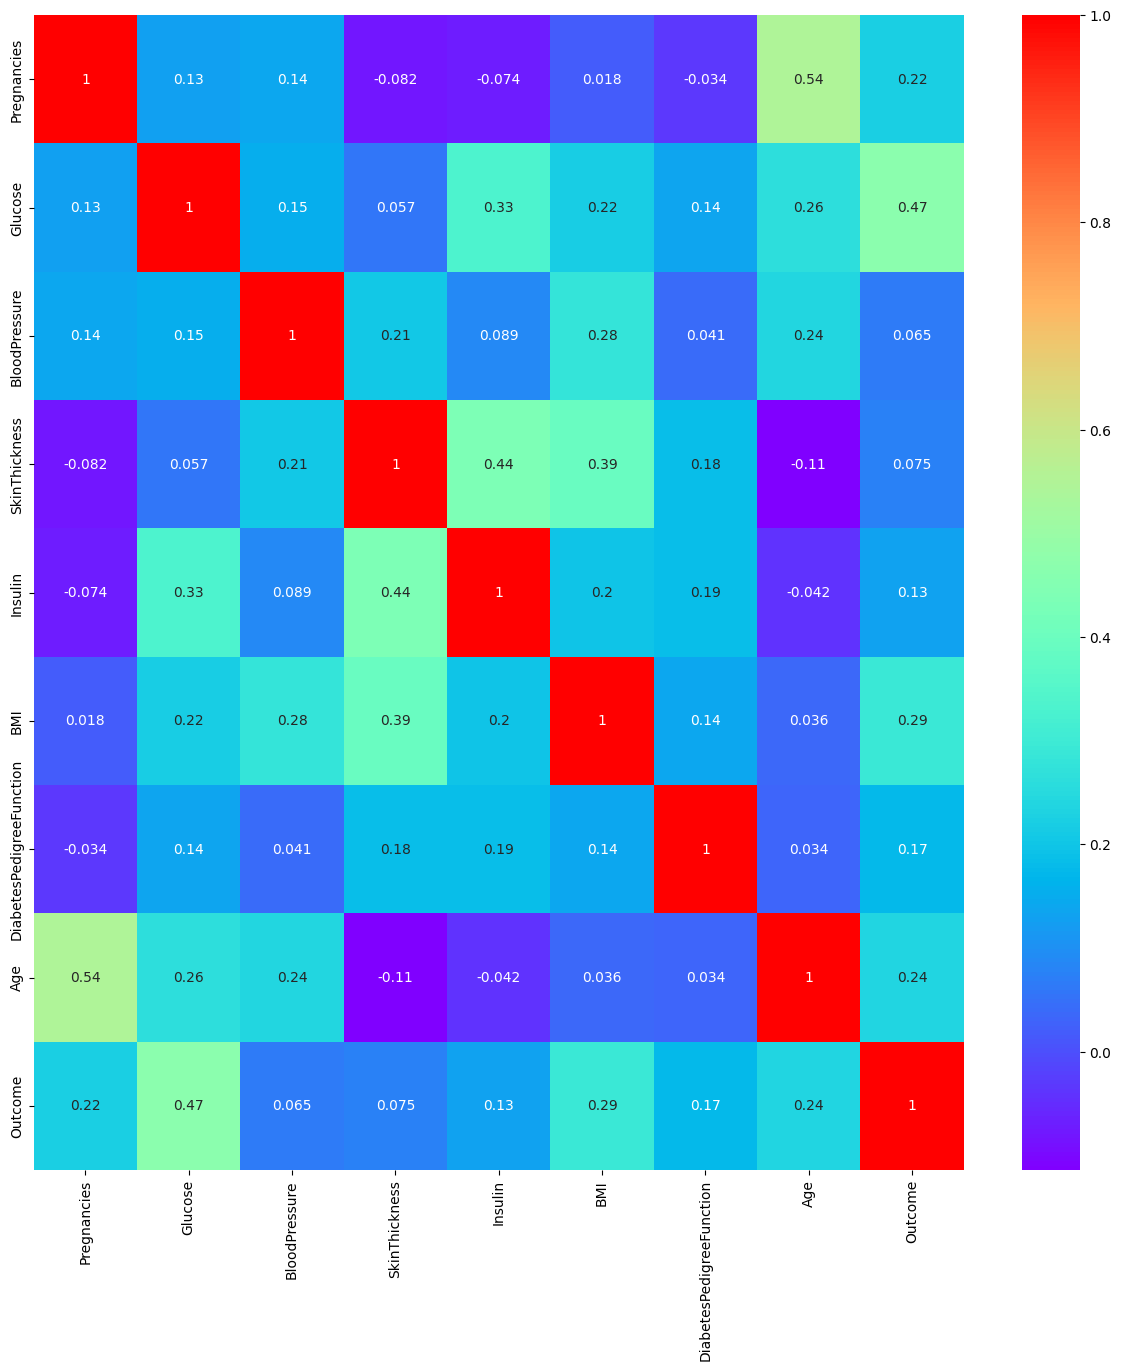

In [14]:

# Finding correlation
plt.figure(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='rainbow')

In [15]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 66.7 MB/s et

In [17]:
from pycaret.classification import *

In [18]:
train_data = df.sample(frac = 0.8, random_state=101).reset_index(drop=True)
test_data = df.drop(train_data.index).reset_index(drop=True)

In [19]:
train_data.shape,test_data.shape

((614, 9), (154, 9))

In [20]:
train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,126,60,0,0,30.1,0.349,47,1
1,3,187,70,22,200,36.4,0.408,36,1
2,7,106,92,18,0,22.7,0.235,48,0
3,0,135,68,42,250,42.3,0.365,24,1
4,4,84,90,23,56,39.5,0.159,25,0


In [21]:
test_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,11,138,74,26,144,36.1,0.557,50,1
1,3,106,72,0,0,25.8,0.207,27,0
2,6,117,96,0,0,28.7,0.157,30,0
3,2,68,62,13,15,20.1,0.257,23,0
4,9,112,82,24,0,28.2,1.282,50,1


In [22]:
abc= setup(data=train_data, target='Outcome', pca=True, pca_components=0.95, session_id=123)

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(614, 9)"
4,Transformed data shape,"(614, 3)"
5,Transformed train set shape,"(429, 3)"
6,Transformed test set shape,"(185, 3)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [23]:
# Comparing all model
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7668,0.0000,0.5495,0.7166,0.6167,0.4544,0.4660,0.0290
lr,Logistic Regression,0.7622,0.8213,0.5495,0.7058,0.6122,0.4456,0.4564,0.8100
lda,Linear Discriminant Analysis,0.7622,0.8204,0.5495,0.7058,0.6122,0.4456,0.4564,0.0670
nb,Naive Bayes,0.7621,0.8151,0.5229,0.7200,0.6002,0.4381,0.4526,0.0310
qda,Quadratic Discriminant Analysis,0.7575,0.8107,0.5295,0.7061,0.5988,0.4312,0.4442,0.0300
rf,Random Forest Classifier,0.7574,0.7825,0.5748,0.6771,0.6129,0.4410,0.4483,0.2150
lightgbm,Light Gradient Boosting Machine,0.7505,0.7870,0.6090,0.6675,0.6273,0.4423,0.4500,0.3110
knn,K Neighbors Classifier,0.7458,0.7563,0.5833,0.6570,0.6135,0.4257,0.4309,0.0470
gbc,Gradient Boosting Classifier,0.7458,0.8010,0.5567,0.6694,0.6013,0.4181,0.4266,0.1450
ada,Ada Boost Classifier,0.7457,0.7757,0.5829,0.6626,0.6135,0.4260,0.4332,0.1120


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

In [24]:
# create a model
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6977,0.8357,0.4667,0.5833,0.5185,0.3021,0.3061
1,0.7674,0.8119,0.5333,0.7273,0.6154,0.4543,0.4655
2,0.7209,0.7786,0.5333,0.6154,0.5714,0.3661,0.3682
3,0.7674,0.8262,0.5333,0.7273,0.6154,0.4543,0.4655
4,0.7674,0.8262,0.6667,0.6667,0.6667,0.4881,0.4881
5,0.7907,0.8548,0.6667,0.7143,0.6897,0.5320,0.5328
6,0.8837,0.9214,0.8000,0.8571,0.8276,0.7400,0.7410
7,0.6512,0.7690,0.3333,0.5000,0.4000,0.1677,0.1746
8,0.8372,0.9643,0.5333,1.0000,0.6957,0.5981,0.6532


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [25]:
# HyperParameter Tunning

tuned_ridge = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6977,0.8357,0.4667,0.5833,0.5185,0.3021,0.3061
1,0.7674,0.8119,0.5333,0.7273,0.6154,0.4543,0.4655
2,0.7209,0.7786,0.5333,0.6154,0.5714,0.3661,0.3682
3,0.7674,0.8262,0.5333,0.7273,0.6154,0.4543,0.4655
4,0.7674,0.8262,0.6667,0.6667,0.6667,0.4881,0.4881
5,0.7907,0.8548,0.6667,0.7143,0.6897,0.5320,0.5328
6,0.8837,0.9214,0.8000,0.8571,0.8276,0.7400,0.7410
7,0.6512,0.7690,0.3333,0.5000,0.4000,0.1677,0.1746
8,0.8372,0.9643,0.5333,1.0000,0.6957,0.5981,0.6532


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [26]:
predict_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7081,0.7571,0.4062,0.6190,0.4906,0.2982,0.3112


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label,prediction_score
211,0,118,84,47,230,45.799999,0.551,31,1,0,0.7362
477,4,120,68,0,0,29.600000,0.709,34,0,0,0.7004
140,1,95,66,13,38,19.600000,0.334,25,0,0,0.8839
176,4,83,86,19,0,29.299999,0.317,34,0,0,0.9083
406,6,104,74,18,156,29.900000,0.722,41,1,0,0.8230
...,...,...,...,...,...,...,...,...,...,...,...
579,1,96,64,27,87,33.200001,0.289,21,0,0,0.8866
578,7,159,66,0,0,30.400000,0.383,36,1,1,0.6844
204,3,116,0,0,0,23.500000,0.187,23,0,0,0.8288
439,4,109,64,44,99,34.799999,0.905,26,1,0,0.8193


In [27]:

unseen_prediction = predict_model(lr, data=test_data)
unseen_prediction



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7597,0.8066,0.5091,0.7368,0.6022,0.4382,0.4535


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label,prediction_score
0,11,138,74,26,144,36.099998,0.557,50,1,0,0.5132
1,3,106,72,0,0,25.799999,0.207,27,0,0,0.8115
2,6,117,96,0,0,28.700001,0.157,30,0,0,0.6915
3,2,68,62,13,15,20.100000,0.257,23,0,0,0.9600
4,9,112,82,24,0,28.200001,1.282,50,1,0,0.7331
...,...,...,...,...,...,...,...,...,...,...,...
149,10,101,76,48,180,32.900002,0.171,63,0,0,0.8247
150,2,122,70,27,0,36.799999,0.340,27,0,0,0.6980
151,5,121,72,23,112,26.200001,0.245,30,0,0,0.7142
152,1,126,60,0,0,30.100000,0.349,47,1,0,0.6381


In [28]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [31]:
# Applying all the model together

# LogisticRegression
logistic = LogisticRegression()
lr = logistic.fit(x_train, y_train)
y_pred_lr = logistic.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dtree = DecisionTreeClassifier()
dt = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest
rfmodel = RandomForestClassifier()
rf = rfmodel.fit(x_train, y_train)
y_pred_rf = rfmodel.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# BaggingClassifier
bagg = BaggingClassifier()
bg = bagg.fit(x_train, y_train)
y_pred_bg = bagg.predict(x_test)
accuracy_bg = accuracy_score(y_test, y_pred_bg)

# AdaBoostClassifier
ada = AdaBoostClassifier()
ad = ada.fit(x_train, y_train)
y_pred_ad = ada.predict(x_test)
accuracy_ad = accuracy_score(y_test, y_pred_ad)

# GradientBoostingClassifier
gdb = GradientBoostingClassifier()
gd = gdb.fit(x_train, y_train)
y_pred_gd = gdb.predict(x_test)
accuracy_gd = accuracy_score(y_test, y_pred_gd)

# XGBClassifier
xgb = XGBClassifier()
xg = xgb.fit(x_train, y_train)
y_pred_xg = xgb.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)


# SVM
svc = SVC()
sv = svc.fit(x_train, y_train)
y_pred_sv = svc.predict(x_test)
accuracy_sv = accuracy_score(y_test, y_pred_sv)


# KNN
knn = KNeighborsClassifier()
kn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# GaussianNB
naive_gb = GaussianNB()
ngb = naive_gb.fit(x_train, y_train)
y_pred_ngb = naive_gb.predict(x_test)
accuracy_ngb = accuracy_score(y_test, y_pred_ngb)

# BernoulliNB
naive_bn = BernoulliNB()
nbr = naive_bn.fit(x_train, y_train)
y_pred_nbr = naive_bn.predict(x_test)
accuracy_nbr = accuracy_score(y_test, y_pred_nbr)

In [32]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

In [33]:
bcp = VotingClassifier(estimators=[('lr',lr),('dt',dt),('rf', rf),('bg', bg),('ad',ad),
                                  ('gd', gd),('xg', xg),('sv', sv),('kn', kn),
                                  ('ngb', ngb),('nbr', nbr)], voting='hard')

model_bcp = bcp.fit(x_train, y_train)
pred_bcp = bcp.predict(x_test)
accuracy_bcp = accuracy_score(y_test, pred_bcp)

              Method Used  Accuracy
0      LogisticRegression  0.740260
1            DecisionTree  0.709957
2            RandomForest  0.748918
3                 Bagging  0.714286
4                Adaboost  0.744589
5        GradientBoosting  0.753247
6                 XGBoost  0.727273
7           SupportVector  0.735931
8       KNearestNeighbors  0.688312
9      NaiveBayesGaussian  0.744589
10  NaiveBayesBernoullies  0.653680
11       VotingClassifier  0.748918
Axes(0.125,0.11;0.775x0.77)


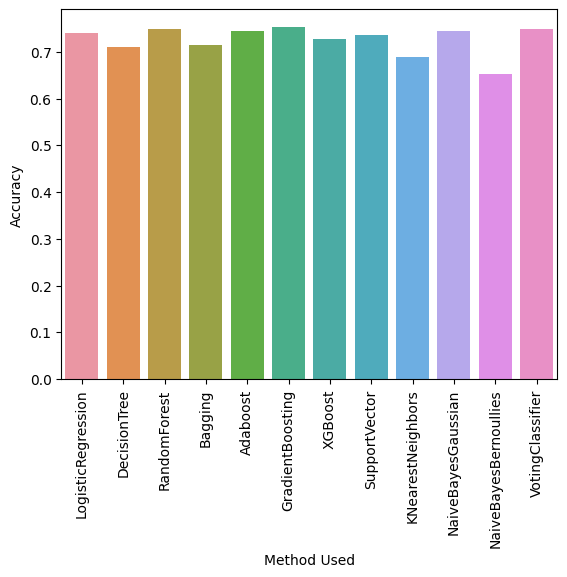

In [34]:
list1 = ['LogisticRegression','DecisionTree','RandomForest','Bagging','Adaboost',
         'GradientBoosting', 'XGBoost','SupportVector','KNearestNeighbors',
         'NaiveBayesGaussian','NaiveBayesBernoullies','VotingClassifier']

list2 = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_bg,accuracy_ad, accuracy_gd,
         accuracy_xg, accuracy_sv, accuracy_knn, accuracy_ngb, accuracy_nbr, accuracy_bcp]

list3 = [logistic, dtree, rfmodel, bagg, ada, gdb, xgb, svc, knn, naive_gb,naive_bn, bcp ]

final_accuracy = pd.DataFrame({'Method Used': list1, "Accuracy": list2})
print(final_accuracy)

charts = sns.barplot(x="Method Used", y = 'Accuracy', data=final_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
# save model
save_model(lr, 'lr_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pregnancies', 'Glucose',
                                              'BloodPressure', 'SkinThickness',
                                              'Insulin', 'BMI',
                                              'DiabetesPedigreeFunction',
                                              'Age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [38]:
file_name="lr_model.pkl"
df2 = pd.read_pickle(file_name)
print(df2)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']
